In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv


In [2]:
df_twitter=pd.read_csv("/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv")
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df_twitter.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [4]:
print(df_twitter.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [5]:
df_twitter.drop('id', axis=1, inplace=True)

In [6]:
df_twitter.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_offensive=pd.read_csv("/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv")
df_offensive.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [10]:
print(df_offensive.columns)

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


In [11]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [12]:
df_offensive.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<Axes: xlabel='class', ylabel='count'>

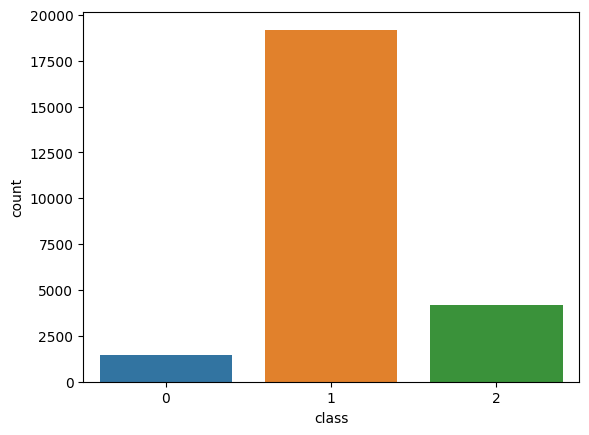

In [13]:
sns.countplot(x='class', data=df_offensive)

In [14]:
df_offensive[df_offensive['class']==0]['class']=1

/tmp/ipykernel_36/2275510384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offensive[df_offensive['class']==0]['class']=1


In [15]:
df_offensive.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [16]:
df_offensive['class'].unique()

array([2, 1, 0])

In [17]:
df_offensive[df_offensive['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [18]:
df_offensive["class"].replace({0: 1}, inplace=True)
df_offensive['class'].unique()

/tmp/ipykernel_36/3438869248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_offensive["class"].replace({0: 1}, inplace=True)


array([2, 1])

<Axes: xlabel='class', ylabel='count'>

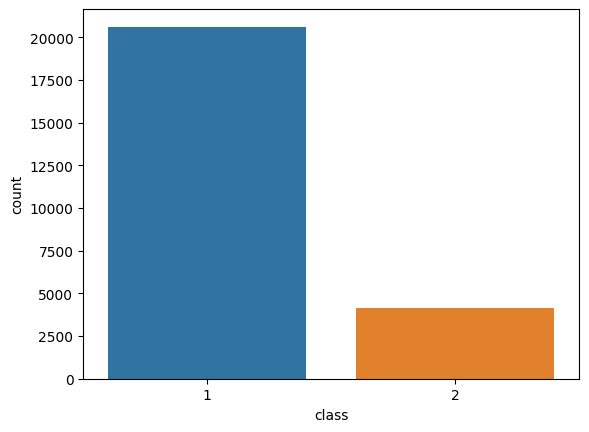

In [19]:
sns.countplot(x='class',data=df_offensive)

In [20]:
df_offensive[df_offensive['class']==0]

,class,tweet


In [21]:
df_offensive["class"].replace({2: 0}, inplace=True)

/tmp/ipykernel_36/3605325422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_offensive["class"].replace({2: 0}, inplace=True)


<Axes: xlabel='class', ylabel='count'>

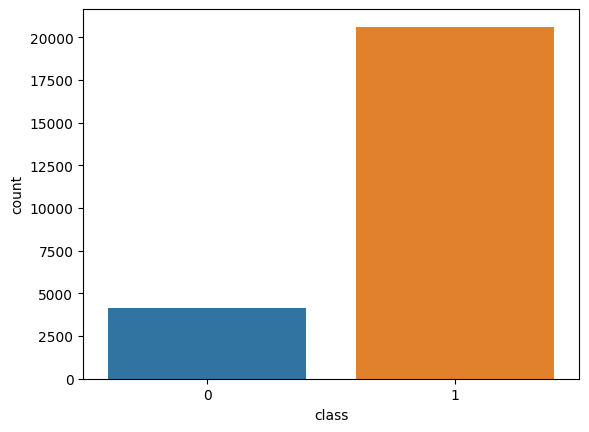

In [22]:
sns.countplot(x='class',data=df_offensive)

In [23]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [24]:
df_offensive.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [25]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

In [26]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

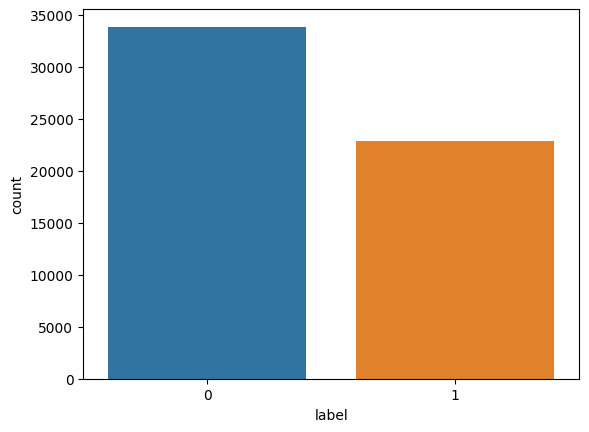

In [27]:
sns.countplot(x='label',data=df)

In [31]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#because wordnet was not being downloaded normally so below code snippet is to unzip the downloaded file to use in further process

import subprocess
# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/worki

In [32]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove content within brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = re.sub(r'[^\x00-\x7f]', r'', text)  # Remove non-ASCII characters (including emojis)
    
    # Remove stopwords and apply lemmatization
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stopword]
    
    # Join the list of words back into a string
    return " ".join(text)

In [33]:
df['tweet'] = df['tweet'].apply(clean_text)
df.head()

,label,tweet
0,0,user father dysfunctional selfish drag kid dys...
1,0,user user thanks lyft credit cant use cause do...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation


In [36]:
x=df['tweet']
y=df['label']

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

42558 42558
14187 14187


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)

In [42]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
count.vocabulary_

{'picture': 488216,
 'gallery': 236718,
 'live': 379857,
 'blackcavalier': 72436,
 'caucasian': 100375,
 'webcam': 741720,
 'picture gallery': 488349,
 'gallery live': 236721,
 'live blackcavalier': 379898,
 'blackcavalier caucasian': 72437,
 'caucasian webcam': 100381,
 'picture gallery live': 488350,
 'gallery live blackcavalier': 236722,
 'live blackcavalier caucasian': 379899,
 'blackcavalier caucasian webcam': 72438,
 'picture gallery live blackcavalier': 488351,
 'gallery live blackcavalier caucasian': 236723,
 'live blackcavalier caucasian webcam': 379900,
 'picture gallery live blackcavalier caucasian': 488352,
 'gallery live blackcavalier caucasian webcam': 236724,
 'shoutout': 591356,
 'everybody': 190917,
 'follow': 218535,
 'nicca': 448176,
 'shoutout everybody': 591382,
 'everybody follow': 191010,
 'follow nicca': 218804,
 'shoutout everybody follow': 591383,
 'everybody follow nicca': 191011,
 'shoutout everybody follow nicca': 591384,
 'user': 694101,
 'bet': 50734,
 's

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [46]:
!pip install tensorflow

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [47]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [48]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint = ModelCheckpoint(
    filepath='model_weights.weights.h5',  # Updated filepath
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [51]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=10,validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 542ms/step - accuracy: 0.6073 - loss: 0.6546 - val_accuracy: 0.8521 - val_loss: 0.4068
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 529ms/step - accuracy: 0.8632 - loss: 0.3865 - val_accuracy: 0.9072 - val_loss: 0.2533
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 537ms/step - accuracy: 0.9091 - loss: 0.2471 - val_accuracy: 0.9230 - val_loss: 0.2077
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 531ms/step - accuracy: 0.9267 - loss: 0.1997 - val_accuracy: 0.9371 - val_loss: 0.1748
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 533ms/step - accuracy: 0.9418 - loss: 0.1664 - val_accuracy: 0.9450 - val_loss: 0.1649
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 530ms/step - accuracy: 0.9499 - loss: 0.1472 - val_accuracy: 0.9415 - val_loss: 0.1707
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 522ms/step - accuracy: 0.9561 - loss: 0.1318 - val_accuracy: 0.9435 - val_loss: 0.1589
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 18s 526ms/step - accuracy: 0.9619 - loss: 0.1146 - val_accu

In [52]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [53]:
accr = model.evaluate(test_sequences_matrix,y_test)

444/444 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step - accuracy: 0.9400 - loss: 0.1755


In [56]:
lstm_prediction=model.predict(test_sequences_matrix)

444/444 ━━━━━━━━━━━━━━━━━━━━ 49s 110ms/step


In [57]:
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,res))

[[8195  258]
 [ 589 5145]]


In [65]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
model.save("hateAndOffensiveDetection_model.h5")

In [67]:
from tensorflow.keras.models import load_model

# Load the Keras model
model = load_model("./hateAndOffensiveDetection_model.h5")

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [84]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords
stopword = set(stopwords.words('english'))

def clean_text(text):
    print("Original text:", text)
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters (including emojis)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with digits
    
    print("After cleaning:", text)
    
    # Tokenize and remove stopwords
#     words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stopword]
#     text = ' '.join(words)
    
    print("After lemmatization:", text)
    return text

# Example usage
test = 'I hate the concept of gender equality!!!'
test = [clean_text(test)]

# Load tokenizer and model
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)
    
model = load_model("./hateAndOffensiveDetection_model.h5")

# Convert text to sequences and pad
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)

print("Sequences:", seq)
print("Padded sequences:", padded)

# Predict
pred = model.predict(padded)

print("Prediction:", pred)
if np.mean(pred) < 0.5:
    print("no hate")
else:
    print("hate and offensive")


Original text: I hate the concept of gender equality!!!
After cleaning: i hate the concept of gender equality
After lemmatization: i hate the concept of gender equality
Sequences: [[11941, 64, 4079, 4269, 2135]]
Padded sequences: [[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     